### Heart Diseases Predictive model

In [1]:
# Import the necessary library


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Data Exploration and Preprocessing 

In [2]:
# Read the heart disease data into a DataFrame
heart_disease_data  = pd.read_csv('heart.csv')

In [3]:
# Display the fisrt 5 rows of the dataset
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Displaying the DataFrame's columns names and their datatypes

heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Checking the shape of the dataset

print(("rows, columns"),heart_disease_data.shape)

rows, columns (303, 14)


In [6]:
#Checkinf for unique values in each features

heart_disease_data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [7]:
# Checking for missing values in each faetures

heart_disease_data.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [8]:
# Check for duplicates
duplicates = heart_disease_data[heart_disease_data.duplicated()]

if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:")
    print(duplicates)

Duplicates found:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  


In [9]:
# Deleting the duplicate entries

heart_disease_data.drop_duplicates(inplace=True)

In [10]:
print(("rows, columns"), heart_disease_data.shape)

rows, columns (302, 14)


In [11]:
# Getting the descriptive statistics of the DataFrame

heart_disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
#Checking correlation between the class/target and the features
corr_matrix = heart_disease_data.corr()
print(corr_matrix["target"].sort_values(ascending=False))

target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64


In [13]:
corr_matrix = heart_disease_data.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


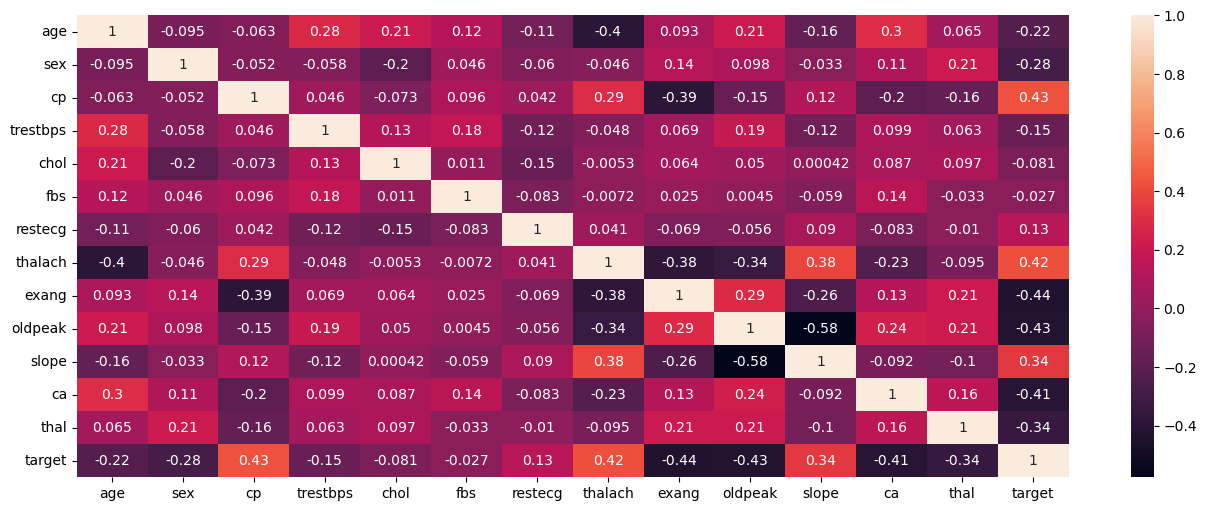

In [14]:
# Heatmap for the correlation between features and the target variables

plt.figure(figsize = (16,6))
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns,annot = True)
plt.show()

In [5]:
# Seperating the features from target variable

x = heart_disease_data.drop(columns = 'target')
y = heart_disease_data['target']

In [5]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [8]:
y.value_counts()

1    165
0    138
Name: target, dtype: int64

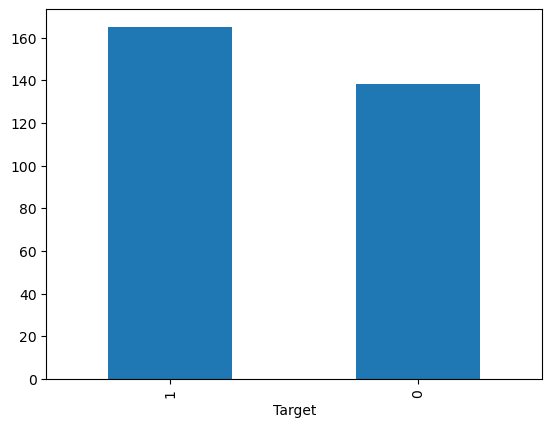

In [9]:
y.value_counts().plot(kind= 'bar')
plt.xlabel("Target")
plt.show()

In [6]:
#Addressing the imbalance of the target class
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(x, y)

In [7]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


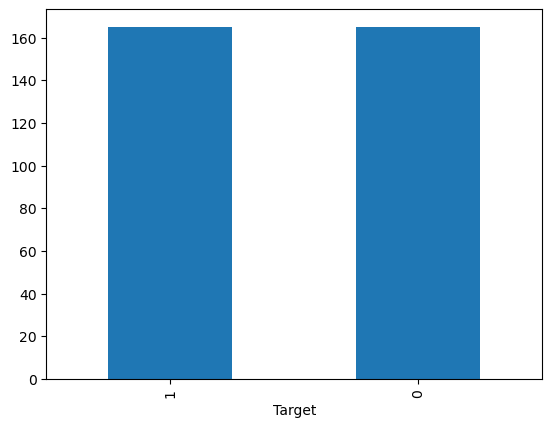

In [8]:
Y.value_counts().plot(kind= 'bar')
plt.xlabel("Target")
plt.show()

In [9]:
# Spliting the data into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [10]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
217,63,1,0,130,330,1,0,132,1,1.800000,2,3,3
29,53,1,2,130,197,1,0,152,0,1.200000,0,0,2
320,60,0,0,129,327,0,0,169,0,0.000000,2,0,2
20,59,1,0,135,234,0,1,161,0,0.500000,1,0,3
46,44,1,2,140,235,0,0,180,0,0.000000,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,52,1,0,125,139,0,0,114,1,1.393751,1,0,3
192,54,1,0,120,188,0,1,113,0,1.400000,1,1,3
117,56,1,3,120,193,0,0,162,0,1.900000,1,0,3
47,47,1,2,138,257,0,0,156,0,0.000000,2,0,2


In [15]:
y_train

217    0
29     1
320    0
20     1
46     1
      ..
323    0
192    0
117    1
47     1
172    0
Name: target, Length: 231, dtype: int64

In [16]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
122,41,0,2,112,268,0,0,172,1,0.000000,2,0,2
66,51,1,2,100,222,0,1,143,1,1.200000,1,0,2
142,42,0,2,120,209,0,1,173,0,0.000000,1,0,2
246,56,0,0,134,409,0,0,150,1,1.900000,1,2,3
146,44,0,2,118,242,0,1,149,0,0.300000,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,62,0,0,138,294,1,1,106,0,1.900000,1,3,2
73,51,1,0,140,261,0,0,186,1,0.000000,2,0,2
322,48,1,0,121,249,0,0,144,0,0.914338,1,0,2
312,43,1,0,120,173,0,0,130,1,2.625441,0,0,2


In [17]:
y_test

122    1
66     1
142    1
246    0
146    1
      ..
252    0
73     1
322    0
312    0
190    0
Name: target, Length: 99, dtype: int64

In [10]:
# Normalizing the features for training
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_train

array([[0.70833333, 1.        , 0.        , ..., 1.        , 0.75      ,
        1.        ],
       [0.5       , 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.64583333, 0.        , 0.        , ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.5625    , 1.        , 1.        , ..., 0.5       , 0.        ,
        1.        ],
       [0.375     , 1.        , 0.66666667, ..., 1.        , 0.        ,
        0.66666667],
       [0.60416667, 1.        , 0.33333333, ..., 0.5       , 0.        ,
        0.66666667]])

In [13]:
X_test

array([[0.25      , 0.        , 0.66666667, ..., 1.        , 0.        ,
        0.66666667],
       [0.45833333, 1.        , 0.66666667, ..., 0.5       , 0.        ,
        0.66666667],
       [0.27083333, 0.        , 0.66666667, ..., 0.5       , 0.        ,
        0.66666667],
       ...,
       [0.54166667, 1.        , 0.        , ..., 0.5       , 0.25      ,
        0.66666667],
       [0.60416667, 1.        , 0.        , ..., 0.5       , 0.        ,
        0.66666667],
       [0.45833333, 0.        , 0.        , ..., 0.5       , 0.        ,
        1.        ]])

###### Training the model Using Logistic Regression

In [11]:
import time
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

In [13]:
# Initializing and training the model

start_time = time.time()   #Initializing the start time to capture the execution time
logreg =  LogisticRegression()
logreg_model= logreg.fit(X_train, y_train)

logreg_time = time.time() - start_time
print('Accuracy of Logistics Regression classifier on training set: {:.2f}'.format(logreg_model.score(X_train, y_train)))
print('Accuracy of Logistics Regression classifier on test set: {:.2f}'.format(logreg_model.score(X_test, y_test)))
print('Logistic Regression classifier Training Time (seconds):',logreg_time)

Accuracy of Logistics Regression classifier on training set: 0.86
Accuracy of Logistics Regression classifier on test set: 0.79
Logistic Regression classifier Training Time (seconds): 0.006406545639038086


In [14]:
#predicting heart dissease using with the logistics regression model

heart_disease_prediction = logreg_model.predict(X_test)
heart_disease_prediction[:10]

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [15]:
# Evaluating the Logistics Regression Classifier using cross validation setting CV = 5. 

logreg_accuracy = cross_val_score(logreg_model, X_train, y_train, cv=5)
print("Logistic Regression Accuracy:",round(logreg_accuracy.mean()*100,2),"%")

Logistic Regression Accuracy: 84.41 %


In [16]:
# Evaluating the Logistics Regression Classifier using cross validation setting CV = 10. 

logreg_accuracy = cross_val_score(logreg_model, X_train, y_train, cv=10)
print("Logistic Regression Accuracy:",round(logreg_accuracy.mean()*100,2),"%")

Logistic Regression Accuracy: 83.97 %


In [17]:
# Generating the model classification report showing the Precision, Recall and F-Score

print(classification_report(y_test,heart_disease_prediction))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75        41
           1       0.84      0.79      0.81        58

    accuracy                           0.79        99
   macro avg       0.78      0.79      0.78        99
weighted avg       0.79      0.79      0.79        99



In [18]:
#Confusion matrix for the model
logreg_matrix = confusion_matrix(y_test,heart_disease_prediction)
logreg_matrix

array([[32,  9],
       [12, 46]], dtype=int64)

In [19]:
#Normalizing the model confusion matrix
Nlogreg_matrix = confusion_matrix(y_test, heart_disease_prediction,normalize='true')
Nlogreg_matrix

array([[0.7804878 , 0.2195122 ],
       [0.20689655, 0.79310345]])

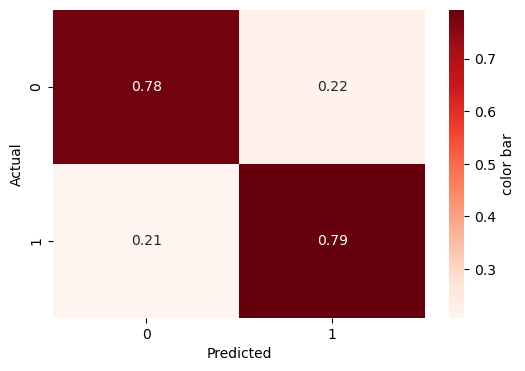

In [20]:
#Heat map for the model confusion matrix
plot1= plt.subplots(figsize=(6,4))
sns.heatmap(Nlogreg_matrix, cmap="Reds", annot = True, cbar_kws={"orientation":"vertical","label":"color bar"})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [21]:
# Persisting the Heart disease predictive model
import pickle

model_dump = pickle.dumps(logreg_model)
with open('heart_disease_model.pkl', 'wb') as model_file:
    model_file.write(model_dump)

In [23]:
# Predicting heart_disease from the model

#Loading the Logistic Regression model
with open('heart_disease_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

heart_disease_predict = loaded_model.predict(X_test)
print("Heart disease Predictions using the loaded Logistic Regression model:")
print(heart_disease_predict[:10])


Heart disease Predictions using the loaded Logistic Regression model:
[1 1 1 0 1 1 0 1 1 1]
